# Matplotlib and Seaborn

source: https://github.com/melbournebioinformatics/data_tidying_and_visualisation

## Setup 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# This causes Jupyter to display any matplotlib plots directly in the notebook
# It also works for seaborn, since seaborn uses matplotlib to render plots
%matplotlib inline
from matplotlib import pyplot as plt

Be aware that Seaborn automatically changes Matplotlib's defaults *on import*. Not only your Seaborn plots, but also your Matplotlib plots, will look different once Seaborn is imported. If you don't want this behaviour, you can call `sns.reset_orig()` after import, or `import seaborn.apionly as sns` in the first place.

In [3]:
import seaborn as sns

## Data 

### LTEE data 

This data is from the [Long Term Evolution Experiment (LTEE)](http://myxo.css.msu.edu/ecoli/). This experiment has been running for over 30 years and over 50,000 E. coli generations, and is still ongoing. Twelve separate populations of E. coli have been propagated for the life of the experiment. Every 500 generations, each population is cloned and stored, allowing researchers to study evolutionary behaviour over the long term, and to "rewind and replay" alternate evolutionary trajectories by propagating from an earlier clone. 

Several interesting events have occurred during the experiment. Some populations have spontaneously developed hypermutator phenotypes. In addition, around generation 31,000 one population, Ara-3, spontaneously developed a rare and novel Cit+ mutation, giving it the ability to metabolise citrate in the substrate.

There have been many publications from this experiment. A handful:

- [Blount et al 2008: Historical contingency and the evolution of a key innovation in an experimental population of Escherichia coli](https://www.pnas.org/content/105/23/7899) - on the spontaneous development of citrate metabolisation and on potentiating mutations
- [Tenaillon et al 2016: Tempo and mode of genome evolution in a 50,000-generation experiment](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4988878) - various investigations by sequencing and variant-calling over 50,000 generations of clones, including discussion of hypermutator phenotypes and genetic drift vs natural selection.

Sequence data from clones is available, but for this workshop we'll just be using some published tabular data.

A version of this dataset is also used by the [Data Carpentry lessons on Genomics](https://datacarpentry.org/genomics-workshop/).

In this lesson we'll use a large flat file containing both sample metadata on each clone, and information on observed mutations in their genomes.

In [4]:
# If you have done the pandas and data tidying workshop and saved the final file,
# you can try reading that file in here if you prefer
ltee = pd.read_csv("ltee_merged.csv", index_col="Strain ID")

In [5]:
ltee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, REL768A to REL11390
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Population                        264 non-null    object 
 1   Generation                        264 non-null    int64  
 2   Mutator                           264 non-null    object 
 3   Reference                         264 non-null    object 
 4   Facility                          264 non-null    object 
 5   Accession                         264 non-null    object 
 6   Read Type                         264 non-null    object 
 7   Read Length                       264 non-null    int64  
 8   Sequencing Depth                  264 non-null    float64
 9   Analysis Notes                    13 non-null     object 
 10  Total Mutations                   264 non-null    int64  
 11  Base Substitutions                264 non-null    int64  
 12  IS

In [6]:
ltee.head()

,Population,Generation,Mutator,Reference,Facility,Accession,Read Type,Read Length,Sequencing Depth,Analysis Notes,...,Estimated Final Genome Size,Synonymous Base Substitutions,Nonsynonymous Base Substitutions,Nonsense Base Substitutions,Pseudogene Base Substitutions,Noncoding RNA Base Substitutions,Intergenic Base Substitutions,Days,Cell size,Relative fitness
Strain ID,,,,,,,,,,,,,,,,,,,,,
REL768A,Ara+1,500,None,This study,Genoscope,SRR2584408,single,36,70.241277,NaN,...,4623568,0,2,0,0,0,1,75.0,0.480,1.1565
REL768B,Ara+1,500,None,This study,Genoscope,SRR2584409,single,36,41.136778,NaN,...,4626389,0,1,0,0,0,0,75.0,0.480,1.1565
REL958A,Ara+1,1000,None,This study,Genoscope,SRR2584410,single,36,33.226052,NaN,...,4627268,0,2,0,0,0,0,150.0,0.495,1.1251
REL958B,Ara+1,1000,None,This study,Genoscope,SRR2584411,single,36,34.589932,NaN,...,4631258,0,1,0,0,0,0,150.0,0.495,1.1251
REL1062A,Ara+1,1500,None,This study,Genoscope,SRR2584438,single,36,40.342099,NaN,...,4623507,0,4,0,0,0,1,225.0,NaN,1.2194


## Matplotlib 

Matplotlib is the oldest and still the fundamental plotting library in Python. It has a huge range of capabilities. Many other libraries (including Seaborn) use Matplotlib as a back-end renderer.

Today we're focusing on plotting tabular data. We won't touch on all Matplotlib's capabilities. If you want to see more of the range of things Matplotlib can do, you can look through the [Matplotlib gallery](https://matplotlib.org/gallery.html.), or try out this excellent [Matplotlib tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/).

Some simple Matplotlib plots, inline in the notebook:

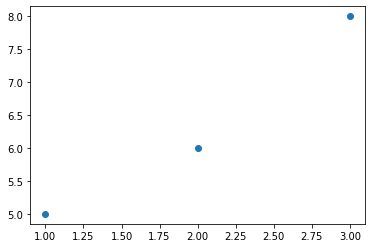

In [7]:
plt.scatter(x=[1, 2, 3], y=[5, 6, 8])

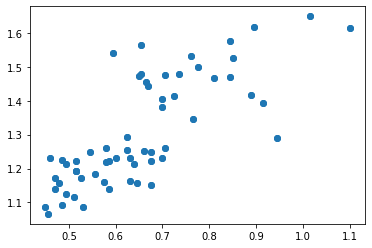

In [8]:
plt.scatter(x=ltee["Cell size"], y=ltee["Relative fitness"])

An example Matplotlib plot with legend and annotation:

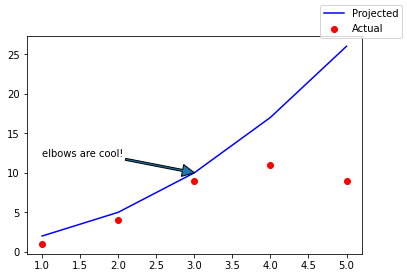

In [196]:
x = [1, 2, 3, 4, 5]
y = [2, 5, 10, 17, 26]
y2 = [1, 4, 9, 11, 9]

fig, ax = plt.subplots()
ax.plot(x, y, c="blue", label="Projected")
ax.scatter(x, y2, c="red", label="Actual")
fig.legend()
ax.annotate("elbows are cool!", xy=(3, 10), xytext=(1, 12), arrowprops={"width": 2})

fig.savefig("example_matplotilb.png")

## Seaborn Plots

Seaborn builds on Matplotlib. Some nice features are:

- works directly with Pandas dataframes, concise syntax
- lots of plot types, including some more advanced options
- statistical plotting: many plots do summary statistics for you
- good default aesthetics and easy control of aesthetics
- uses Matplotlib, so can use all Matplotlib backends (incl lots of image file formats)
- underlying Matplotlib objects can be tweaked directly

For completeness, here's the plot we made before. Start by creating a DataFrame to hold the data.

In [10]:
df = pd.DataFrame(
    {
        "Time": [1, 2, 3, 4, 5],
        "Projected": [2, 5, 10, 17, 26],
        "Actual": [1, 4, 9, 11, 9],
    }
)
df

,Time,Projected,Actual
0,1,2,1
1,2,5,4
2,3,10,9
3,4,17,11
4,5,26,9


We can create a set of subplots (in this case just 1) with `matplotlib`. Each subplot is an `Axes` object.

Text(1, 12, 'I love elbows!')

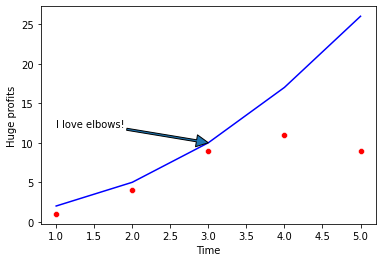

In [197]:
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.scatterplot(data=df, x="Time", y="Actual", color="red", ax=ax)
sns.lineplot(data=df, x="Time", y="Projected", color="blue", ax=ax)

# y-axis label
ax.set_ylabel("Huge profits")

# plot text and arrow
ax.annotate("I love elbows!", xy=(3, 10), xytext=(1, 12), arrowprops={"width": 2})

Notice that we can add changes like annotations in exactly the same way, as we have Matplotlib Figure and Axes objects.

### Seaborn and Pandas 

However, Seaborn is aware of Pandas and it is very common to use Seaborn directly with DataFrames. Plotting functions can take a DataFrame as their `data` parameter and then refer directly to column names:

<AxesSubplot:xlabel='Mutator', ylabel='Cell size'>

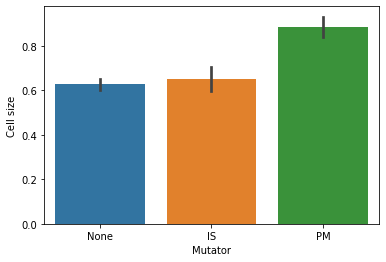

In [12]:
sns.barplot(data=ltee, x="Mutator", y="Cell size")

Here Seaborn has interpreted the `x` and `y` arguments as field names in the supplied DataFrame. Notice also that Seaborn has performed the summary statistics for us - in this case, using the default `estimator`, which is `mean()`. 

Notice also what happens if we simply swap the `x` and `y` parameters. Seaborn will automatically deduce that the categorical or string-like variable must be the bar labels, and the numeric variable must be the numeric axis:

<AxesSubplot:xlabel='Cell size', ylabel='Mutator'>

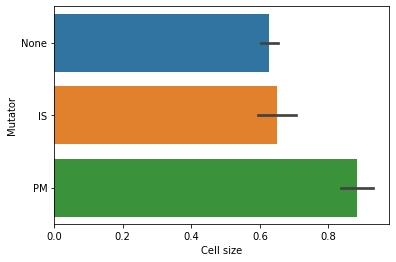

In [13]:
sns.barplot(data=ltee, x="Cell size", y="Mutator")

#### Exercises: 

**1:** Create a count plot using `sns.countplot()` on the `ltee` data, showing how many clones have each `Mutator` phenotype. Note that you do not need to specify the `y` axis variable for a countplot, just the `x` axis variable (i.e. category).

**2:** Create a (vertical) bar plot using the `ltee` data, showing how `Relative fitness` varies depending on each `Mutator` phenotype.

Bar plots are often deplored as a way of showing statistical estimates, as only the top of the bar is really important, and the bar itself is a visual distraction. A point plot is an alternative, and plots like box plots can show more information. Several other plot types also show distributional information within categories.

**3:** Reproduce the plot you just made, using instead each of the Seaborn functions:

- pointplot()
- boxplot()
- violinplot()  (try the `scale` parameter)
- boxenplot()
- stripplot() [SEE WARNING]  (try the `jitter` parameter)
- swarmplot() [SEE WARNING]

Note what sort of information about the distribution is shown by each.

WARNING: `stripplot()` and `swarmplot()` will plot individual data points. There are too many house sales to easily display in this way - you may want to subsample the dataframe with e.g.  `data=sales.sample(100)`.

<AxesSubplot:xlabel='Mutator', ylabel='count'>

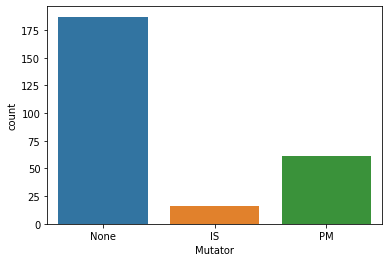

In [14]:
sns.countplot(data=ltee, x="Mutator")

<AxesSubplot:xlabel='Mutator', ylabel='Relative fitness'>

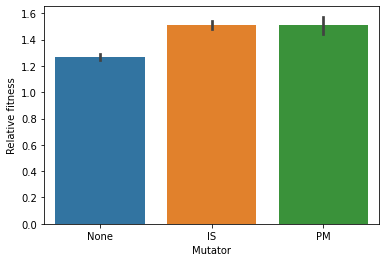

In [15]:
sns.barplot(data=ltee, x="Mutator", y="Relative fitness")

<AxesSubplot:xlabel='Mutator', ylabel='Relative fitness'>

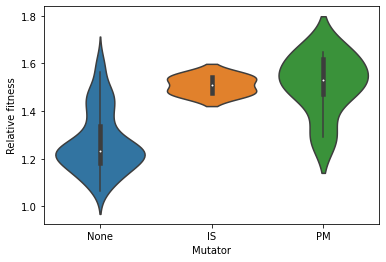

In [16]:
sns.violinplot(data=ltee, x="Mutator", y="Relative fitness", scale="width")

### Hue 

Many Seaborn plotting functions take a `hue` parameter. This colours the plot elements by some categorical variable, but more than this, summary statistics are calculated for each level of the hue variable.

<AxesSubplot:xlabel='Generation', ylabel='Total Mutations'>

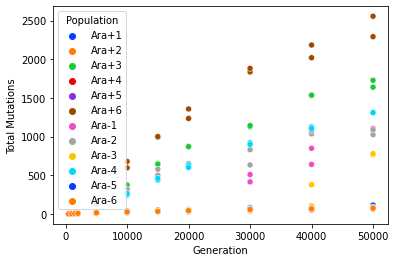

In [186]:
sns.scatterplot(
    data=ltee,
    x="Generation",
    y="Total Mutations",
    palette="bright",
    hue="Population",
)

<AxesSubplot:xlabel='Generation', ylabel='Total Mutations'>

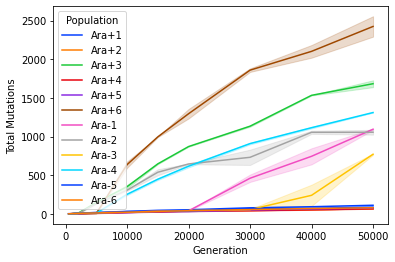

In [187]:
sns.lineplot(
    data=ltee,
    x="Generation",
    y="Total Mutations",
    palette="bright",
    hue="Population",
)

#### Exercises:

1. Subset the `ltee` dataset to get only the clones where the `Mutator` value is "PM"
2. Create an `lmplot` of `Total Mutations` over time (i.e. against `Generation`). Do this without a `hue` parameter, then add in `Population` as the `hue` parameter. (Hint: the syntax for `lmplot` is identical to the syntax of the other plot types)
3. Try adding the `hue` parameter to one of your previous plots of some other type - for instance, a box plot.

In [20]:
subset = ltee[ltee["Mutator"] == "PM"]

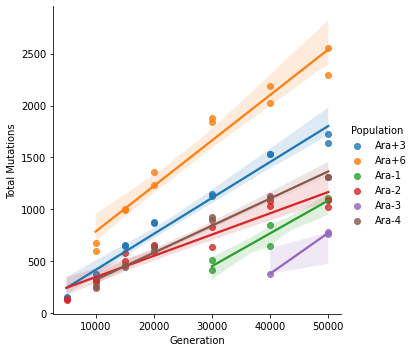

In [22]:
sns.lmplot(data=subset, x="Generation", y="Total Mutations", hue="Population")

For discrete color palettes, as needed by the `hue` parameter, Seaborn has a `color_palette()` function to generate a useful range of palettes. You can find [a tutorial on choosing color palettes here](https://seaborn.pydata.org/tutorial/color_palettes.html). 

### Compound plots 

Seaborn has some plotting functions which create more complex figures made of multiple subplots. These include `cat()`, `catplot()`, `jointplot()`, `lmplot()` and `clustermap()`. Let's see a few examples:

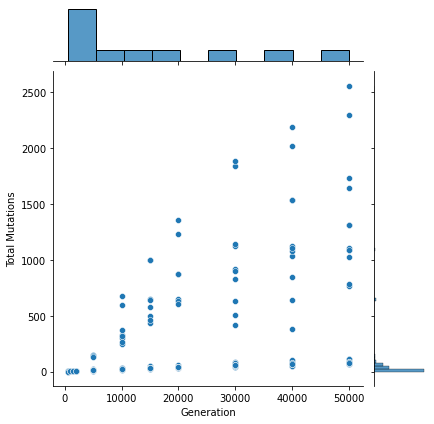

In [24]:
# jointplot shows a scatter or density plot, with marginal distributions
sns.jointplot(data=ltee, x="Generation", y="Total Mutations")

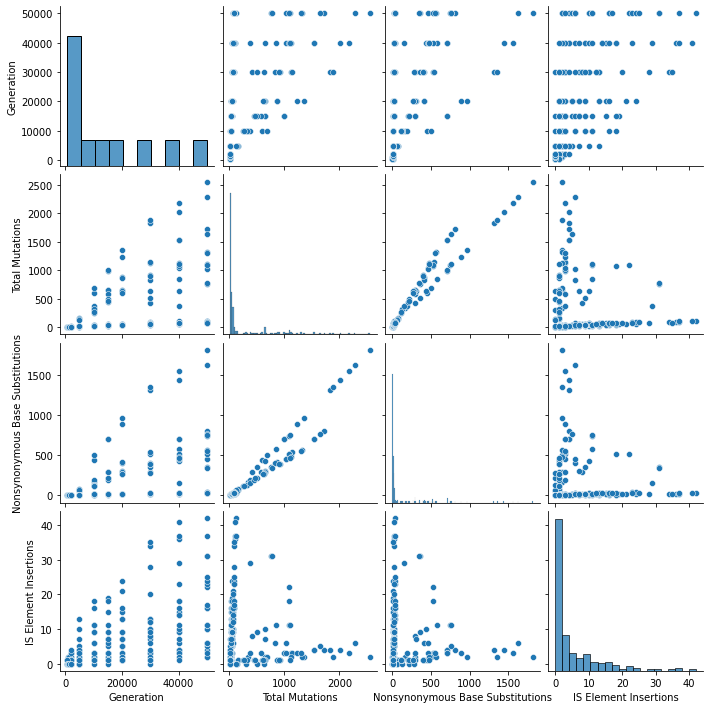

In [25]:
# pairplot shows pairwise relationships between variables
sns.pairplot(
    data=ltee,
    vars=[
        "Generation",
        "Total Mutations",
        "Nonsynonymous Base Substitutions",
        "IS Element Insertions",
    ],
)
# hue='Mutator')

Let's use `hue` to visually separate by `Mutator` phenotype.

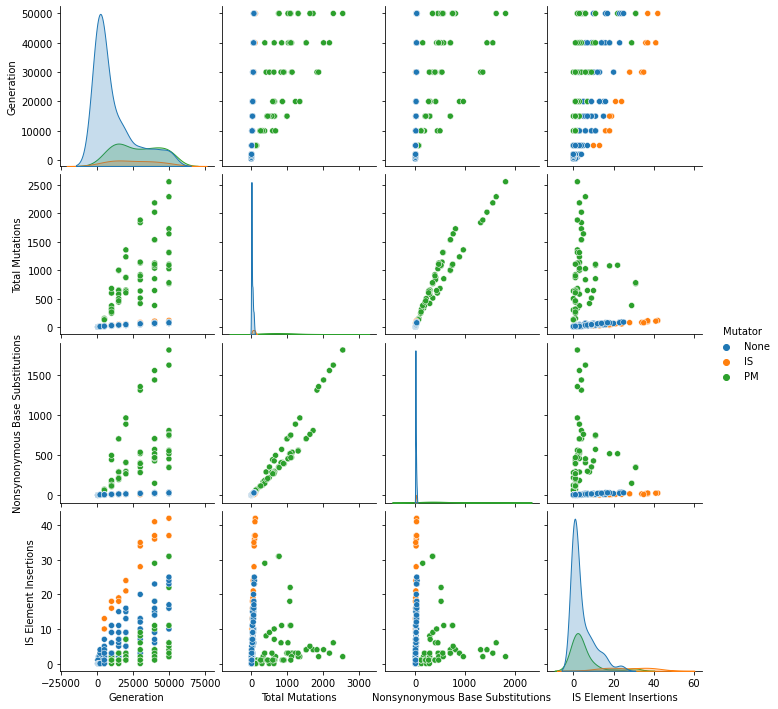

In [26]:
# pairplot shows pairwise relationships between variables
sns.pairplot(
    data=ltee,
    vars=[
        "Generation",
        "Total Mutations",
        "Nonsynonymous Base Substitutions",
        "IS Element Insertions",
    ],
    hue="Mutator",
)

#### Exercise:

Create a joint plot using the `ltee` data showing `Cell size` against `Relative fitness`

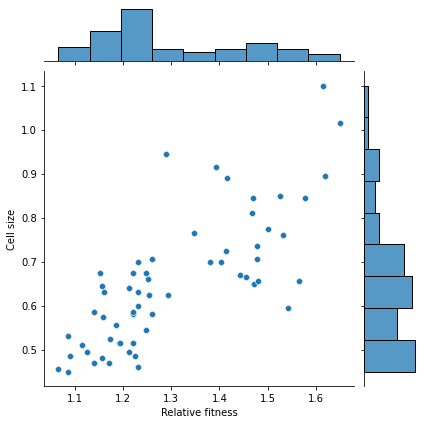

In [28]:
sns.jointplot(data=ltee, x="Relative fitness", y="Cell size")

### Colour and Palettes

Seaborn has good colour options. There are a few ways we could want to use access colours:

* Specify an individual colour for some plot element. Matplotlib named colours can be used, or rgb values specified. Also check out the `sns.xkcd_rgb` dictionary of 954 named colours from the XKCD colour survey - for instance, `sns.xkcd['fire engine red']` is a colour.
* Specify a colormap, for mapping a continuous value to colour. All Matplotlib colormaps can be used by name. You can see these under the `plt.cm` module. Seaborn's `light_palette()` and `dark_palette()` functions can also generate custom colourmaps easily.
* Specify a discrete colour palette (a list of colours), for mapping a discrete or categorical variable to colour. In Seaborn, there is a distinction between colour palettes and colormaps. In general, you can create a colour palette by explicitly listing some colours, or by selecting a series of colours along some colormap. There are several functions, including `color_palette()`, `light_palette()`, `dark_palette()`, `diverging_palette()` and `xkcd_palette()`, which can produce many discrete colour palettes of whatever size you need. 

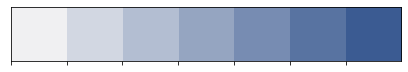

In [29]:
# An example discrete colour palette of 7 colours, based on the XKCD colour "denim blue"
# palplot is a function to visualise a palette
palette = sns.light_palette("denim blue", n_colors=7, input="xkcd")
sns.palplot(palette)

**Exercise:** Try out the Seaborn function `choose_diverging_palette()` in your notebook (it requires no arguments). You can assign the result to a variable.

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

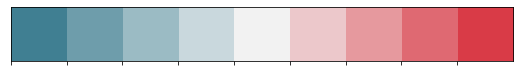

In [30]:
p = sns.choose_diverging_palette()

In [31]:
p

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

### Heatmap
Let's try a heatmap. Unlike most Seaborn functions, heatmaps take data in `wide-form`. We'll need to pivot our `long-form` data to get a table of numbers, indexed by two variables. The heatmap function will then transform each number to a colour via a continuous colourmap.

#### Reshaping DataFrames

Use `ltee.pivot_table()` to produce a table showing the (average) number of mutations per Population and Generation. 

- The x-axis (column headers) should be the values of the `Generation` variable.
- The rows (index) should be the values of the `Population` variable.
- The values should be those from the `Total Mutations` variable.

`ltee` is in `long-form`.

In [32]:
ltee[["Population", "Generation", "Total Mutations"]].head()

,Population,Generation,Total Mutations
Strain ID,,,
REL768A,Ara+1,500,4
REL768B,Ara+1,500,3
REL958A,Ara+1,1000,4
REL958B,Ara+1,1000,2
REL1062A,Ara+1,1500,7


Pivotting produces `long-form` data.

In [33]:
mutations_table = ltee.pivot_table(
    index="Population", columns="Generation", values="Total Mutations", aggfunc="mean"
)

mutations_table.head()

Generation,500,1000,1500,2000,5000,10000,15000,20000,30000,40000,50000
Population,,,,,,,,,,,
Ara+1,3.5,3.0,6.5,8.5,20.5,33.5,47.5,55.0,80.0,94.0,113.0
Ara+2,2.0,4.0,5.5,8.5,11.5,24.0,32.0,35.0,46.5,56.0,67.0
Ara+3,2.5,4.0,6.0,8.5,149.5,353.0,648.5,872.0,1135.5,1534.5,1684.5
Ara+4,2.5,3.0,8.0,6.0,9.5,21.0,27.0,38.0,43.0,54.0,67.5
Ara+5,2.0,4.0,4.5,6.5,13.0,18.5,30.5,32.5,50.5,65.0,76.5


Now seaborn can easily produce a heatmap from the `long-form` data.

<AxesSubplot:xlabel='Generation', ylabel='Population'>

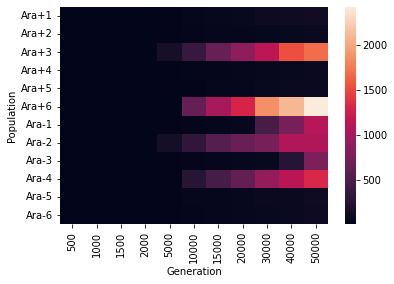

In [34]:
sns.heatmap(mutations_table)

#### Exercises:

* If you haven't already, produce a heatmap with the `ltee` pivot table you produced above.
* Specify a different colourmap using the `cmap` parameter to `heatmap`. An ascending (not diverging) colourmap is appropriate for counts that are all positive.
* Some populations have far more mutations than others, and so our heatmap doesn't really show detail for the lower end of the scale. Try to plot a heatmap where colour is based on the *log* of the mutation count.  

In [35]:
log_mutations = np.log(mutations_table)

<AxesSubplot:xlabel='Generation', ylabel='Population'>

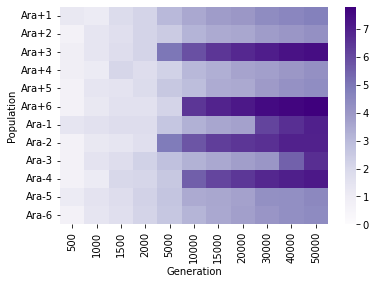

In [136]:
sns.heatmap(log_mutations, vmin=0, cmap="Purples")

# Heatmaps in Bioinformatics

<details>
    <summary>A plethora of examples...</summary>
<img src="img/clustered-heatmaps.jpeg" alt="Clustered heatmaps Google Image search">    
</details>

This is one of the most popular visualizations for a bird-eyes view of omics data. Hierarchically clustered heatmaps visually place similar rows and columns close to each other. There are two main use cases:
1. Visualizing `[samples x features]` data 
    - RNA-seq gene expression is a classic example. `samples` are individual RNA-seq libraries and `features` are genes. This is often used to simultaneously view similar samples as well as similarly expressed genes.
2. Visualizing `[samples x samples]` similarity
    - This is a quick way to see the pairwise similarity between samples.

These plots can be conveniently generated with `seaborn.clustermap()`.

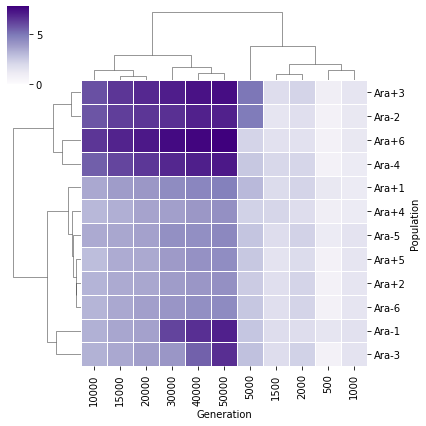

In [140]:
sns.clustermap(log_mutations, vmin=0, cmap="Purples", linewidth=0.75, figsize=(6, 6))

Our visualization looks good, but how do we identify which populations cluster together? Under the hood, the `clustermap()` method performs agglomerative clustering to order rows and columns. Let's see how to perform this step ourselves and extract cluster labels for each population.

## Identifying populations with similar mutation rates

Let's perform agglomerative clustering as implemented in the `scikit-learn` package. We won't get into the details of the clustering algorithm today, but this approach requires manually specifying the number of clusters we would like to annotate.

In [171]:
n_clusters = 2

In [172]:
from sklearn.cluster import AgglomerativeClustering

# Cluster populations by mutation frequency
pop_clusters = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(log_mutations)

In [173]:
pop_clusters = pd.Series(pop_clusters, log_mutations.index)
pop_clusters

Population
Ara+1    0
Ara+2    0
Ara+3    1
Ara+4    0
Ara+5    0
Ara+6    1
Ara-1    0
Ara-2    1
Ara-3    0
Ara-4    1
Ara-5    0
Ara-6    0
dtype: int64

Define a color palette to visualize cluster labels.

In [174]:
palette = sns.color_palette("colorblind", n_colors=n_clusters)

Give every cluster a unique color.

In [175]:
pop_colors = [palette[i] for i in pop_clusters]

### Samples x features
Now let's put it all together and visually label populations according to cluster. We do this by passing `pop_colors` to `row_colors`. Additionally, we should preserve the chronological ordering of the generations axis with `col_cluster=False`.

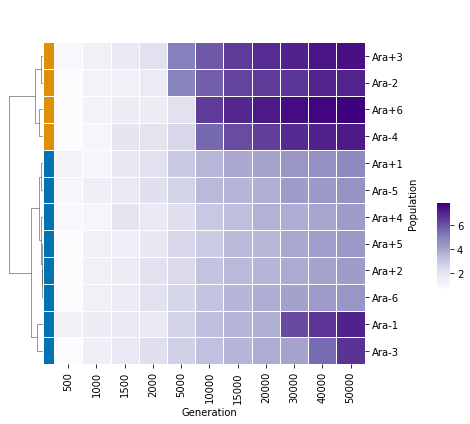

In [176]:
# Draw the full plot
g = sns.clustermap(
    log_mutations,
    col_cluster=False,
    method="ward",
    cmap="Purples",
    row_colors=pop_colors,
    dendrogram_ratio=(0.1, 0.1),
    cbar_pos=(1.02, 0.32, 0.03, 0.2),
    linewidths=0.75,
    figsize=(6, 6),
)

### Samples x samples

Sample-wise correlation give an idea of their similarity. We can use the built-in `pd.DataFrame.corr()` method to calculate the Pearson correlation coefficient between all pairs of populations.

In [177]:
pop_corr = log_mutations.T.corr()

In [178]:
pop_clusters = AgglomerativeClustering(
    n_clusters=n_clusters, linkage="ward"
).fit_predict(pop_corr)

In [179]:
pop_colors = [palette[i] for i in pop_clusters]

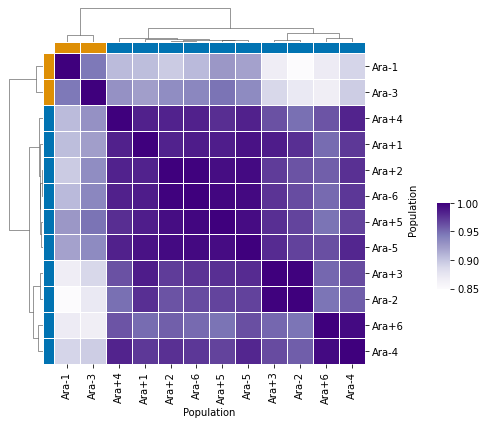

In [180]:
g = sns.clustermap(
    pop_corr,
    method="ward",
    cmap="Purples",
    row_colors=pop_colors,
    col_colors=pop_colors,
    dendrogram_ratio=(0.1, 0.1),
    cbar_pos=(1.02, 0.32, 0.03, 0.2),
    linewidths=0.75,
    figsize=(6, 6),
)

#### Exercise:

Try adjusting the number of population clusters. What do you think the best number of clusters is? Is there a best clustering? Look forward to the machine learning module, where you will learn more about various clustering approaches and best practices. Understanding these methods is crucial to interpret your data in biologically meaningful ways.